In [ ]:
import numpy as np
#from sklearn import linear_model
#import scipy
import matplotlib.pyplot as plt
#Not using

In [ ]:
def LinReg(x, y):
  gram = np.matmul(np.transpose(x), x)
  gram_inv = np.linalg.inv(gram)
  moment = np.matmul(np.transpose(x), y)
  return np.matmul(gram_inv, moment)

In [ ]:
def RidgeReg(x, y, l):
  gram = np.matmul(np.transpose(x), x)
  gram = gram + (l**2) * np.eye(len(gram))
  gram_inv = np.linalg.inv(gram)
  moment = np.matmul(np.transpose(x), y)
  return np.matmul(gram_inv, moment)

In [ ]:
def GenerateDataset(K, N):
  theta_i = np.random.normal(0, 1, K)
  epsilon = np.random.normal(0, np.sqrt(0.1))

  xs = []
  ys = []

  for i in range(N):
    x_i = np.random.normal(0, 2, K)
    xs.append(x_i)

    y = np.sum(x_i * theta_i) + epsilon
    ys.append(y)

  return theta_i, epsilon, xs, ys

In [ ]:
def L2dist(theta_star, theta_hat):
  return np.sqrt(np.sum((theta_star - theta_hat)**2))

In [ ]:
def moving_average(data, window_size):
  ma = []
  for i in range(len(data) - window_size + 1):
    ma.append(sum(data[i:(i + window_size)])/window_size)
  return ma

In [ ]:
Ks = [3, 10, 20] #Just using the K's given in the HW PDF
costs = [0.8, 2, 10]

data_dict = {}

for i in Ks:
  data_dict[str(i)] = {}
  for j in costs:
    data_dict[str(i)][str(j)] = {}
    data_dict[str(i)][str(j)]["theta"], data_dict[str(i)][str(j)]["epsilon"], data_dict[str(i)][str(j)]["xs"], data_dict[str(i)][str(j)]["ys"] = GenerateDataset(i, j)

In [ ]:
K = 100 #Just using the K's given in the HW PDF
cost = 0.5
N = int(cost * K)
N = 1

theta, epsilon, x, y = GenerateDataset(K, N)

#reg = linear_model.LinearRegression()
#reg = linear_model.Ridge(alpha=.5)

#reg.fit(x, y)
#print(theta)
#print(reg.coef_)
#print(L2dist(theta, reg.coef_))

my_theta = LinReg(x, y)
print(L2dist(theta, my_theta))

13409.643725633687


In [ ]:
#p, res, rnk, s = scipy.linalg.lstsq(x, y)
my_theta = LinReg(x, y)
#print(L2dist(p, theta))
print(L2dist(theta, my_theta))
#print(L2dist(p, my_theta))

68.9842944250803


999/999 

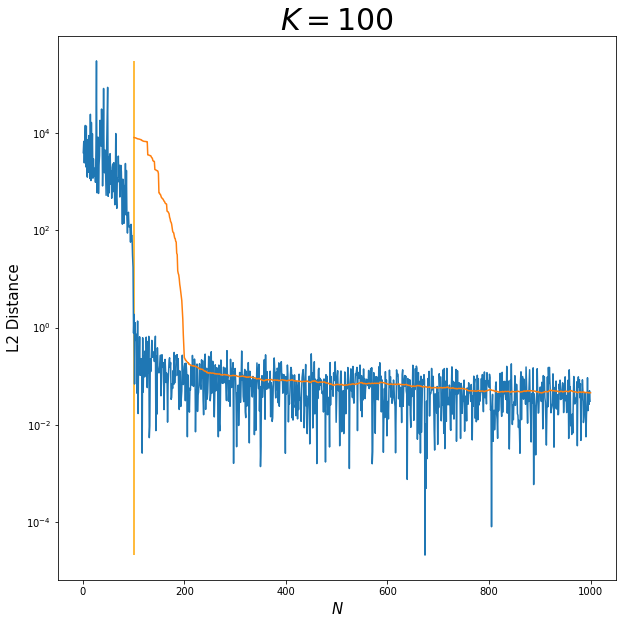

In [ ]:
# L2dist vs # of samples

K = 100
dists = []
max_N = 10*K
min_N = 1
L = 1

for i in range(min_N, max_N):
  print('\r' + str(i) + "/" + str(max_N - min_N), end=' ')
  theta, epsilon, x, y = GenerateDataset(K, i)
  dists.append(L2dist(RidgeReg(x, y, L), theta))

#dists_MA = moving_average(dists, K)

fig = plt.figure(figsize=(10,10))
plt.title("$K=" + str(K) + "$", fontsize=30)
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel("L2 Distance", fontsize=15)
plt.yscale("log")
#plt.plot(np.linspace(0, 1, num=max_N - min_N), dists)
plt.vlines(K, ymin=min(dists), ymax=max(dists), colors='orange')
plt.plot(range(min_N, len(dists)+1), dists)
#plt.plot(range(min_N+K, len(dists_MA)+1+K), dists_MA)

19990/19990 (10, 2000) (10, 2000) (10, 2000)


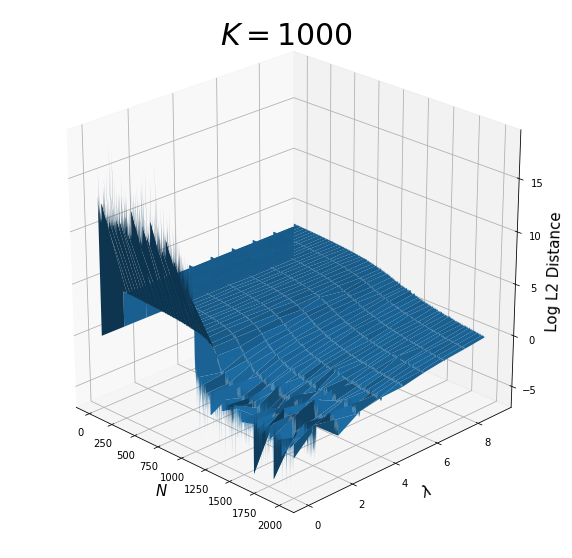

In [ ]:
K = 1000
max_N = 2*K
min_N = 1
L_max = 10
dists = np.zeros((L_max, max_N - min_N + 1))
#L = 1000

for j in range(L_max):
  for i in range(min_N, max_N):
    print('\r' + str(i*(j+1)) + "/" + str((max_N - min_N)*L_max), end=' ')
    theta, epsilon, x, y = GenerateDataset(K, i)
    curr_dist = L2dist(RidgeReg(x, y, j), theta)
    dists[j, i] = np.log(curr_dist)
    #dists_curr.append(L2dist(RidgeReg(x, y, L), theta))
'''
for i in range(min_N, max_N):
    print('\r' + str(i) + "/" + str(max_N - min_N), end=' ')
    theta, epsilon, x, y = GenerateDataset(K, i)
    dists.append(L2dist(RidgeReg(x, y, L), theta))
'''
#dists = moving_average(dists, 100)

fig = plt.figure(figsize=(10,10))
ha = fig.add_subplot(111, projection='3d')
plt.title("$K=" + str(K) + "$", fontsize=30)
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel("$\lambda$", fontsize=15)
X, Y = np.meshgrid(range(max_N - min_N + 1), range(L_max))
print(X.shape, Y.shape, dists.shape)
ha.plot_surface(X, Y, dists)
ha.set_zlabel("Log L2 Distance", fontsize=15)
#ha.set_zscale('log')
ha.view_init(25,-45)
plt.show()

In [ ]:
print(np.mean(theta))

0.057465226643945044
